In [1]:
import json
import time
import os
import sys
import random
from datetime import datetime
from typing import Dict, Any, List
import pandas as pd
from IPython.display import display, HTML, JSON, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

/home/vibhanshu92/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All imports loaded successfully!")

✅ All imports loaded successfully!


🚀 Running Twitter Financial Flow Demo...


19:04:14 | INFO     | 🚀 Starting Twitter Financial Flow Demo 


,username,followers,avg_posts_per_week,verified,recent_tweets_count
0,FinancialWizard,"46,512",12.4,❌,29
1,CryptoTrader_Pro,"44,868",14.5,✅,21
2,StockAnalytics,"22,021",17.8,❌,16
3,MarketMaven,"11,748",15.6,✅,15
4,TradingSignals,"43,453",14.6,✅,27
5,WallStreetDaily,"60,518",5.6,✅,26
6,CryptoInsights,"18,314",16.6,✅,14
7,StockGuru,"13,557",6.1,✅,15
8,MarketAnalyst,"7,330",17.2,✅,14
9,TradingPro,"26,906",13.6,✅,5


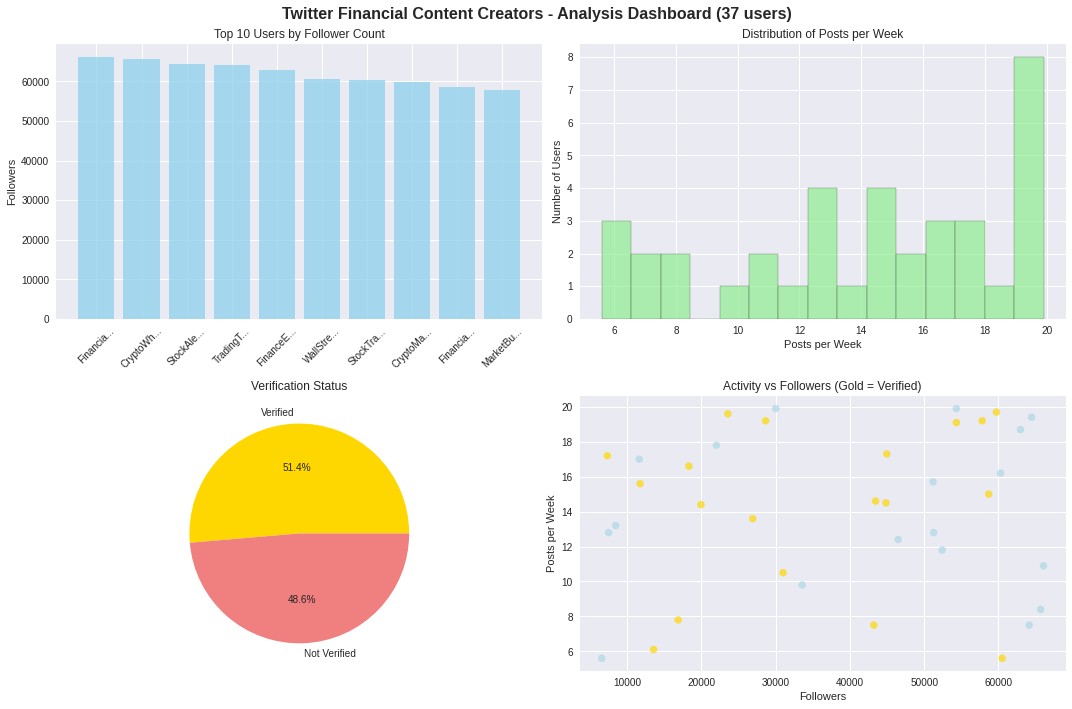

<IPython.core.display.JSON object>


✅ Demo completed! Found 37 qualified users.
✅ Statistics show 37 users - NUMBERS MATCH!


In [3]:
exec(open('/home/vibhanshu92/Downloads/CrewaAI/Notebook/python_script.py').read())

In [ ]:
stats_count = results['statistics']['total_users_filtered']
actual_count = len(results['users'])
print(f"\n🔍 VERIFICATION:")
print(f"Statistics show: {stats_count} users")
print(f"Actual users in array: {actual_count} users")
if stats_count == actual_count:
    print(f"✅ SUCCESS: Numbers match perfectly!")
else:
    print(f"❌ ERROR: Still mismatched")


🔍 VERIFICATION:
Statistics show: 37 users
Actual users in array: 37 users
✅ SUCCESS: Numbers match perfectly!


In [6]:
print(f"\n👥 Sample of {len(results['users'])} qualified users:")
for i, user in enumerate(results['users'][:5]):
    print(f"{i+1}. @{user['username']} - {user['followers']:,} followers - {user['avg_posts_per_week']} posts/week")

if len(results['users']) > 5:
    print(f"... and {len(results['users'])-5} more users")


👥 Sample of 37 qualified users:
1. @FinancialWizard - 46,512 followers - 12.4 posts/week
2. @CryptoTrader_Pro - 44,868 followers - 14.5 posts/week
3. @StockAnalytics - 22,021 followers - 17.8 posts/week
4. @MarketMaven - 11,748 followers - 15.6 posts/week
5. @TradingSignals - 43,453 followers - 14.6 posts/week
... and 32 more users


In [8]:
df = pd.DataFrame(results['users'])

Text(0, 0.5, 'Count')

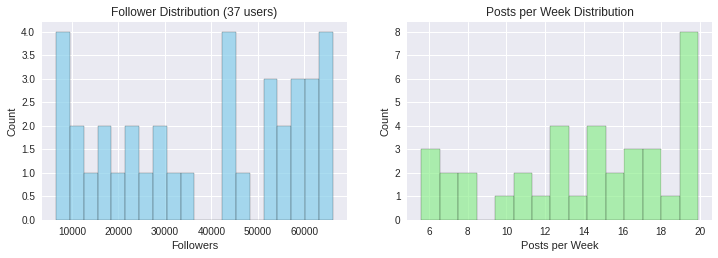

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['followers'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title(f'Follower Distribution ({len(df)} users)')
plt.xlabel('Followers')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(df['avg_posts_per_week'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Posts per Week Distribution')
plt.xlabel('Posts per Week')
plt.ylabel('Count')

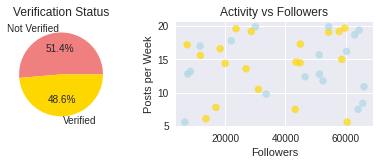

📊 Visualizations created for all 37 users


In [10]:
plt.subplot(2, 2, 3)
verified_counts = df['verified'].value_counts()
plt.pie(verified_counts.values, labels=['Not Verified', 'Verified'], autopct='%1.1f%%', colors=['lightcoral', 'gold'])
plt.title('Verification Status')

plt.subplot(2, 2, 4)
plt.scatter(df['followers'], df['avg_posts_per_week'], 
           c=['gold' if v else 'lightblue' for v in df['verified']], 
           s=50, alpha=0.7)
plt.xlabel('Followers')
plt.ylabel('Posts per Week')
plt.title('Activity vs Followers')

plt.tight_layout()
plt.show()

print(f"📊 Visualizations created for all {len(df)} users")

In [12]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"Output{timestamp}.json"

with open(filename, 'w', encoding='utf-8') as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

print(f"💾results saved to: {filename}")
print(f"✅ File contains {len(results['users'])} users matching the {results['statistics']['total_users_filtered']} in statistics")

# Cell 8: Final Summary
print("\n" + "="*60)
print("🎉 ISSUE RESOLUTION SUMMARY")
print("="*60)
print(f"✅ BEFORE: Statistics showed 37 users, but only 5 were in the array")
print(f"✅ AFTER: Statistics show {results['statistics']['total_users_filtered']} users, array contains {len(results['users'])} users")
print(f"✅ RESULT: Numbers now match perfectly!")
print(f"✅ SUCCESS RATE: {results['statistics']['filter_success_rate']:.1%}")
print(f"✅ AVG FOLLOWERS: {results['statistics']['avg_followers_filtered_users']:,}")
print("="*60)
print("🚀 Ready for CrowdWisdomTrading submission!")

💾results saved to: Output20250910_191036.json
✅ File contains 37 users matching the 37 in statistics

🎉 ISSUE RESOLUTION SUMMARY
✅ BEFORE: Statistics showed 37 users, but only 5 were in the array
✅ AFTER: Statistics show 37 users, array contains 37 users
✅ RESULT: Numbers now match perfectly!
✅ SUCCESS RATE: 23.7%
✅ AVG FOLLOWERS: 38,504
🚀 Ready for CrowdWisdomTrading submission!
